# ETH, SOL, FTM, ADA ,LUNA, AVAX
## 40-20-10-10-10-10  

In [2]:
from pycoingecko import CoinGeckoAPI
import pandas_datareader as web
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import minimize
from scipy.stats import norm
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from polygon import WebSocketClient, CRYPTO_CLUSTER
from polygon import RESTClient
from datetime import datetime
import quandl


/Users/dennismacpro/miniconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [43]:
sol_df = pd.read_csv('./data/coincodex/solana_2020-12-1_2022-1-17.csv')
sol_df['Date'] = pd.to_datetime(sol_df['Date'])
sol_df.set_index('Date',inplace=True)
sol_df = sol_df.iloc[::-1]
sol_df = sol_df[sol_df.index >= datetime(2020,12,1)]
sol_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,1.962367,2.124009,1.932501,1.977516,3.660476e+07,9.317730e+07
2020-12-02,1.971593,2.172160,1.958971,2.112355,4.113504e+07,9.605753e+07
2020-12-03,2.114955,2.215764,2.080785,2.098405,5.240107e+07,9.900875e+07
2020-12-04,2.098405,2.110675,1.841711,1.856668,3.959888e+07,9.232912e+07
2020-12-05,1.851515,1.977514,1.827409,1.977440,3.075995e+07,8.849150e+07
...,...,...,...,...,...,...
2022-01-12,140.227900,152.942365,138.487796,151.644100,2.327960e+09,4.515453e+10
2022-01-13,151.525600,157.315077,145.866507,146.143700,2.907038e+09,4.703158e+10
2022-01-14,145.835000,150.435737,142.296100,146.287610,2.880095e+09,4.601520e+10


In [44]:
avax_df = pd.read_csv('./data/coincodex/avalanche_2020-12-1_2022-1-17.csv')
avax_df['Date'] = pd.to_datetime(avax_df['Date'])
avax_df.set_index('Date',inplace=True)
avax_df = avax_df.iloc[::-1]
avax_df = avax_df[avax_df.index >= datetime(2020,12,1)]
avax_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,3.704887,3.816191,3.511738,3.576271,3.049215e+07,8.937501e+07
2020-12-02,3.561117,3.844096,3.529078,3.745825,3.153232e+07,9.129669e+07
2020-12-03,3.738596,3.889555,3.723324,3.819472,2.743838e+07,9.302110e+07
2020-12-04,3.820087,3.865357,3.516727,3.556966,2.436822e+07,9.053740e+07
2020-12-05,3.534045,3.718005,3.513630,3.630332,2.445545e+07,8.940219e+07
...,...,...,...,...,...,...
2022-01-12,89.535700,96.522283,88.942000,95.857500,1.156957e+09,2.271101e+10
2022-01-13,95.980700,96.996574,89.663700,89.676900,1.163556e+09,2.287382e+10
2022-01-14,89.491900,91.560474,87.444841,90.260713,1.024667e+09,2.196741e+10


In [45]:
eth_df = pd.read_csv('./data/coincodex/ethereum_2018-12-1_2022-1-17.csv')
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
eth_df.set_index('Date',inplace=True)
eth_df = eth_df.iloc[::-1]
eth_df = eth_df[eth_df.index >= datetime(2020,12,1)]
eth_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,616.183534,634.754677,573.516677,589.814467,2.780131e+10,6.856145e+10
2020-12-02,586.970964,602.820207,578.508054,598.357253,2.929685e+10,6.742433e+10
2020-12-03,598.537314,621.269532,588.649832,616.904853,1.884975e+10,6.886717e+10
2020-12-04,616.551824,618.836053,569.723831,571.978333,1.857875e+10,6.789766e+10
2020-12-05,568.823975,596.047597,563.491212,595.548506,1.865798e+10,6.679529e+10
...,...,...,...,...,...,...
2022-01-12,3239.918200,3409.925100,3215.343755,3374.303800,2.211066e+10,3.934373e+11
2022-01-13,3373.881300,3409.041571,3248.202399,3256.141500,2.203296e+10,3.965815e+11
2022-01-14,3245.768700,3334.329197,3202.761300,3314.714162,1.903904e+10,3.903704e+11


In [6]:
ftm_df = pd.read_csv('./data/coincodex/fantom_2018-12-1_2022-1-17.csv')
ftm_df['Date'] = pd.to_datetime(ftm_df['Date'])
ftm_df.set_index('Date',inplace=True)
ftm_df = ftm_df.iloc[::-1]
ftm_df = ftm_df[ftm_df.index >= datetime(2020,12,1)]
ftm_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,0.021029,0.023130,0.020284,0.020539,1.651956e+07,5.498381e+07
2020-12-02,0.020468,0.022986,0.020120,0.022646,1.459215e+07,5.454534e+07
2020-12-03,0.022651,0.024370,0.022395,0.022888,1.778216e+07,5.895707e+07
2020-12-04,0.022891,0.023116,0.020812,0.021042,1.551331e+07,5.587561e+07
2020-12-05,0.020936,0.022591,0.020684,0.022497,1.163651e+07,5.536606e+07
...,...,...,...,...,...,...
2022-01-12,2.588340,3.005004,2.588340,2.932180,3.900513e+09,7.191380e+09
2022-01-13,2.939825,3.138178,2.803410,3.004518,4.870869e+09,7.578404e+09
2022-01-14,2.996067,3.053992,2.816005,2.957646,4.883717e+09,7.524089e+09


In [7]:
ada_df = pd.read_csv('./data/coincodex/cardano_2018-12-1_2022-1-17.csv')
ada_df['Date'] = pd.to_datetime(ada_df['Date'])
ada_df.set_index('Date',inplace=True)
ada_df = ada_df.iloc[::-1]
ada_df = ada_df[ada_df.index >= datetime(2020,12,1)]
ada_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,0.172047,0.173593,0.148293,0.156136,1.725691e+09,5.149124e+09
2020-12-02,0.155848,0.159587,0.151384,0.158604,1.464832e+09,4.923297e+09
2020-12-03,0.158782,0.167663,0.156116,0.164295,9.251652e+08,5.073393e+09
2020-12-04,0.164265,0.164374,0.147370,0.148866,9.289801e+08,4.959975e+09
2020-12-05,0.148313,0.161347,0.147003,0.159815,8.733234e+08,4.931230e+09
...,...,...,...,...,...,...
2022-01-12,1.186455,1.306466,1.186455,1.303143,1.518278e+09,3.921443e+10
2022-01-13,1.305550,1.350301,1.235559,1.236217,2.265930e+09,4.037356e+10
2022-01-14,1.230540,1.306331,1.223607,1.288240,2.107726e+09,3.968948e+10


In [8]:
luna_terra_df = pd.read_csv('./data/coincodex/luna_2020-12-1_2022-1-17.csv')
luna_terra_df['Date'] = pd.to_datetime(luna_terra_df['Date'])
luna_terra_df.set_index('Date',inplace=True)
luna_terra_df = luna_terra_df.iloc[::-1]
luna_terra_df = luna_terra_df[luna_terra_df.index >= datetime(2020,12,1)]
luna_terra_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,0.395484,0.425683,0.382684,0.389358,2.883559e+06,1.537108e+08
2020-12-02,0.389144,0.407204,0.382617,0.406560,2.197633e+06,1.512835e+08
2020-12-03,0.407661,0.500521,0.407661,0.500521,4.356896e+06,1.725738e+08
2020-12-04,0.501514,0.506210,0.451157,0.452620,8.032839e+06,1.835933e+08
2020-12-05,0.451275,0.507713,0.447554,0.507713,4.309684e+06,1.849394e+08
...,...,...,...,...,...,...
2022-01-12,72.733900,82.941200,71.822500,82.391900,9.076688e+08,2.743757e+10
2022-01-13,82.016300,83.823768,77.558741,78.292500,1.087269e+09,2.895020e+10
2022-01-14,78.185900,82.904873,75.924637,81.729617,9.857812e+08,2.861373e+10


In [9]:
#ETH, SOL, FTM, ADA ,LUNA, AVAX
#40-20-10-10-10-10¶
portfolio_six_coins =['eth','sol','ftm','ada','luna','avax']
portfolio_six_weights=[0.40,0.20,0.10,0.10,0.10,.10]
sum(portfolio_six_weights)

1.0

In [10]:
portfolio_df = pd.concat([eth_df['Close'],sol_df['Close'],ftm_df['Close'],ada_df['Close'],luna_terra_df['Close'], avax_df['Close']],axis=1)
portfolio_df.columns = portfolio_six_coins
portfolio_df

,eth,sol,ftm,ada,luna,avax
Date,,,,,,
2020-12-01,589.814467,1.977516,0.020539,0.156136,0.389358,3.576271
2020-12-02,598.357253,2.112355,0.022646,0.158604,0.406560,3.745825
2020-12-03,616.904853,2.098405,0.022888,0.164295,0.500521,3.819472
2020-12-04,571.978333,1.856668,0.021042,0.148866,0.452620,3.556966
2020-12-05,595.548506,1.977440,0.022497,0.159815,0.507713,3.630332
...,...,...,...,...,...,...
2022-01-12,3374.303800,151.644100,2.932180,1.303143,82.391900,95.857500
2022-01-13,3256.141500,146.143700,3.004518,1.236217,78.292500,89.676900
2022-01-14,3314.714162,146.287610,2.957646,1.288240,81.729617,90.260713


# Research

* https://www.coindesk.com/tech/2021/01/08/ethereum-20-explained-in-4-easy-metrics/
* https://beaconscan.com/
* https://ethereumprice.org/eth-2-calculator/
* https://docs.google.com/spreadsheets/d/15tmPOvOgi3wKxJw7KQJKoUe-uonbYR6HF7u83LR5Mj4/edit#gid=1548910165
* https://cryptoquant.com/asset/eth/chart/eth2
* https://cryptoquant.com/docs#tag/ETH-2.0
* https://cryptoquant.com/docs#operation/ETHgetStakingRate
* https://studio.glassnode.com/metrics?a=ETH&category=ETH%202.0&m=eth2.StakingDepositsCount
* https://www.investopedia.com/terms/d/discrete-compounding.asp

In [257]:
allocation_columns = ['Date','Close','Quantity','Value']
eth_allocation_df = pd.concat([eth_df['Close']],axis=1)

# APY PER Epoch
# yield into days, days into hours, hours into `6.5 minutes
# "5. Rewards (- penalties) are transferred to validators every epoch (384 seconds = ~6.5 minutes)

min_interest_rate = 0.04
compound_period = 365 / 24 / 60 / 9.2307
epoch_min_period_eth_staking_rate = min_interest_rate / compound_period
print(f'Per period interest rate {epoch_min_period_eth_staking_rate}')

total_mins_day = 24 * 60 * 60 # mins
compound_period = 6.5 # mins
num_of_periods = total_mins_day / compound_period

epoch_min_daily_eth_staking_yield =  epoch_min_daily_eth_staking_yield / num_of_periods

print(f'Per day compounding {num_of_periods}')
print(f'Per day interest rates with compounding 6.5 minutes: {epoch_min_daily_eth_staking_yield}')

# 4 % APY
annualized_min_eth_staking_yield = 0.04 / 365

# 8 % APY
annualized_avg_eth_staking_yield = 0.08 / 365

# 22 % APY
annualized_max_eth_staking_yield = 0.22 / 365

# 2.3 % infl
annaulized_us_inflation_rate =  0.023 / 365

tranche_quantity = 32
num_of_tranches  = 1
initial_eth_allocation = tranche_quantity * num_of_tranches

# FV=P(1+ r/m)**(m*t)
# m
# r
# 
#  ) 
# mt
 
# where:
# t=total duration
# m=The number of compounding periods per duration
# 

# p = eth_allocation of 32 
# r = annualized rate of return between 4 and 22% with average of 7%
# m is the times compounded per duration which is 6.5 mins
# t is the duraction or in this up to ~2 years or 730 days, but we want this an an index



eth_allocation_df['Eth_Close'] = eth_allocation_df['Close']
eth_allocation_df['Eth Quantity'] = initial_eth_allocation
eth_allocation_df['Eth Yield Min'] = annualized_min_eth_staking_yield

eth_allocation_df['Daily Period Count'] = 1
eth_allocation_df['Daily Period Count'] = eth_allocation_df['Daily Period Count'].cumsum()

eth_allocation_df['Eth Quantity With Staking Min'] = initial_eth_allocation
eth_allocation_df['Eth Quantity With Staking Min'] = eth_allocation_df['Eth Quantity With Staking Min'] + (eth_allocation_df['Eth Quantity With Staking Min'].cumsum() * annualized_min_eth_staking_yield)

#eth_allocation_df['total'] = (eth_allocation_df['Eth Quantity'] * eth_allocation_df['Eth Yield Min'].shift().add(1).cumprod().fillna(1)).cumsum()
#eth_allocation_df['total'] = (eth_allocation_df['Eth Quantity'] * (1 + annualized_min_eth_staking_yield) ** (eth_allocation_df['Daily Period Count']) )

eth_allocation_df['Eth Quantity With Staking Avg'] = initial_eth_allocation
eth_allocation_df['Eth Quantity With Staking Avg'] = eth_allocation_df['Eth Quantity With Staking Avg'] + (eth_allocation_df['Eth Quantity With Staking Avg'].cumsum() * annualized_avg_eth_staking_yield)

eth_allocation_df['Eth Quantity With Staking Max'] = initial_eth_allocation
eth_allocation_df['Eth Quantity With Staking Max'] = eth_allocation_df['Eth Quantity With Staking Max'] + (eth_allocation_df['Eth Quantity With Staking Max'].cumsum() * annualized_max_eth_staking_yield)


eth_allocation_df['USD Value'] = eth_allocation_df['Eth_Close'] * eth_allocation_df['Eth Quantity']
eth_allocation_df['USD Value Infl'] =  eth_allocation_df['USD Value'] + (eth_allocation_df['USD Value'] * annaulized_us_inflation_rate)

eth_allocation_df['USD Value With Staking Min'] = eth_allocation_df['Eth_Close'] * (eth_allocation_df['Eth Quantity With Staking Min'])
eth_allocation_df['USD Value With Staking Infl Min'] = eth_allocation_df['USD Value With Staking Min'] + (eth_allocation_df['USD Value With Staking Min'] * annaulized_us_inflation_rate)

eth_allocation_df['USD Value With Staking Avg'] = eth_allocation_df['Eth_Close'] * (eth_allocation_df['Eth Quantity With Staking Avg'])
eth_allocation_df['USD Value With Staking Infl Avg'] = eth_allocation_df['USD Value With Staking Avg'] + (eth_allocation_df['USD Value With Staking Avg'] * annaulized_us_inflation_rate)

eth_allocation_df['USD Value With Staking Max'] = eth_allocation_df['Eth_Close'] * (eth_allocation_df['Eth Quantity With Staking Max'])
eth_allocation_df['USD Value With Staking Infl Max'] = eth_allocation_df['USD Value With Staking Max'] + (eth_allocation_df['USD Value With Staking Max'] * annaulized_us_inflation_rate)


eth_allocation_df['Difference Min USD'] = eth_allocation_df['USD Value With Staking Infl Min'] - eth_allocation_df['USD Value Infl']
eth_allocation_df['Difference Min Percentage'] = eth_allocation_df['USD Value With Staking Infl Min'] / eth_allocation_df['USD Value Infl']

eth_allocation_df['Difference Avg USD'] = eth_allocation_df['USD Value With Staking Infl Avg'] - eth_allocation_df['USD Value Infl']
eth_allocation_df['Difference Avg Percentage'] = eth_allocation_df['USD Value With Staking Infl Avg'] / eth_allocation_df['USD Value Infl']

eth_allocation_df['Difference Max USD'] = eth_allocation_df['USD Value With Staking Infl Max'] - eth_allocation_df['USD Value Infl']
eth_allocation_df['Difference Max Percentage'] = eth_allocation_df['USD Value With Staking Infl Max'] / eth_allocation_df['USD Value Infl']


eth_allocation_df = eth_allocation_df.round(4)
eth_allocation_df

Per period interest rate 1.4566803287671235
Per day compounding 13292.307692307691
Per day interest rates with compounding 6.5 minutes: 3.602155832328783e-54


,Close,Eth_Close,Eth Quantity,Eth Yield Min,Daily Period Count,Eth Quantity With Staking Min,Eth Quantity With Staking Avg,Eth Quantity With Staking Max,USD Value,USD Value Infl,...,USD Value With Staking Avg,USD Value With Staking Infl Avg,USD Value With Staking Max,USD Value With Staking Infl Max,Difference Min USD,Difference Min Percentage,Difference Avg USD,Difference Avg Percentage,Difference Max USD,Difference Max Percentage
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-01,589.8145,589.8145,32,0.0001,1,32.0035,32.0070,32.0193,18874.0630,18875.2523,...,18878.1997,18879.3893,18885.4391,18886.6291,2.0685,1.0001,4.1370,1.0002,11.3769,1.0006
2020-12-02,598.3573,598.3573,32,0.0001,2,32.0070,32.0140,32.0386,19147.4321,19148.6387,...,19155.8255,19157.0326,19170.5139,19171.7220,4.1970,1.0002,8.3939,1.0004,23.0833,1.0012
2020-12-03,616.9049,616.9049,32,0.0001,3,32.0105,32.0210,32.0579,19740.9553,19742.1993,...,19753.9357,19755.1804,19776.6513,19777.8975,6.4906,1.0003,12.9812,1.0007,35.6982,1.0018
2020-12-04,571.9783,571.9783,32,0.0001,4,32.0140,32.0281,32.0772,18303.3067,18304.4600,...,18319.3534,18320.5078,18347.4352,18348.5913,8.0239,1.0004,16.0477,1.0009,44.1313,1.0024
2020-12-05,595.5485,595.5485,32,0.0001,5,32.0175,32.0351,32.0964,19057.5522,19058.7531,...,19078.4372,19079.6394,19114.9859,19116.1904,10.4432,1.0005,20.8863,1.0011,57.4373,1.0030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,3374.3038,3374.3038,32,0.0001,408,33.4308,34.8616,39.8694,107977.7216,107984.5257,...,117633.5924,117641.0049,134531.3662,134539.8436,4828.2396,1.0447,9656.4792,1.0894,26555.3179,1.2459
2022-01-13,3256.1415,3256.1415,32,0.0001,409,33.4343,34.8686,39.8887,104196.5280,104203.0938,...,113537.1044,113544.2588,129883.1132,129891.2976,4670.5825,1.0448,9341.1650,1.0896,25688.2038,1.2465
2022-01-14,3314.7142,3314.7142,32,0.0001,410,33.4378,34.8756,39.9079,106070.8532,106077.5371,...,115602.6997,115609.9843,132283.4311,132291.7668,4766.2236,1.0449,9532.4472,1.0899,26214.2297,1.2471


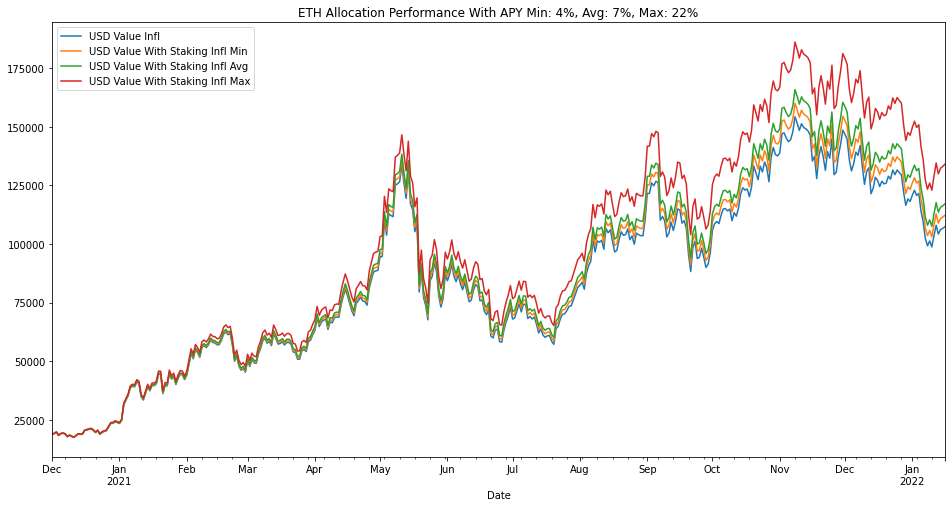

In [265]:
pl = eth_allocation_df.plot(y=['USD Value Infl','USD Value With Staking Infl Min','USD Value With Staking Infl Avg', 'USD Value With Staking Infl Max'],figsize=(16,8),title='ETH Allocation Performance With APY Min: 4%, Avg: 7%, Max: 22%')

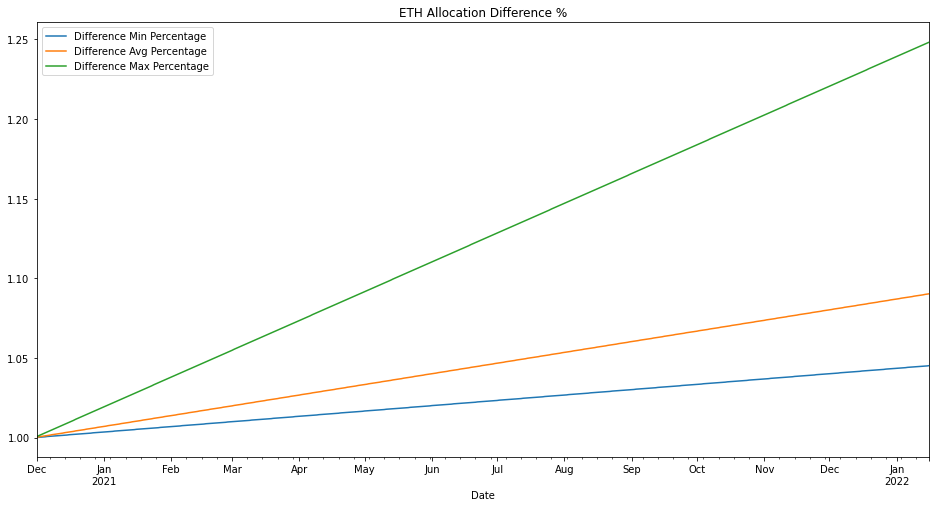

In [262]:
pl = eth_allocation_df.plot(y=['Difference Min Percentage','Difference Avg Percentage','Difference Max Percentage'],figsize=(16,8),title='ETH Allocation Difference %')

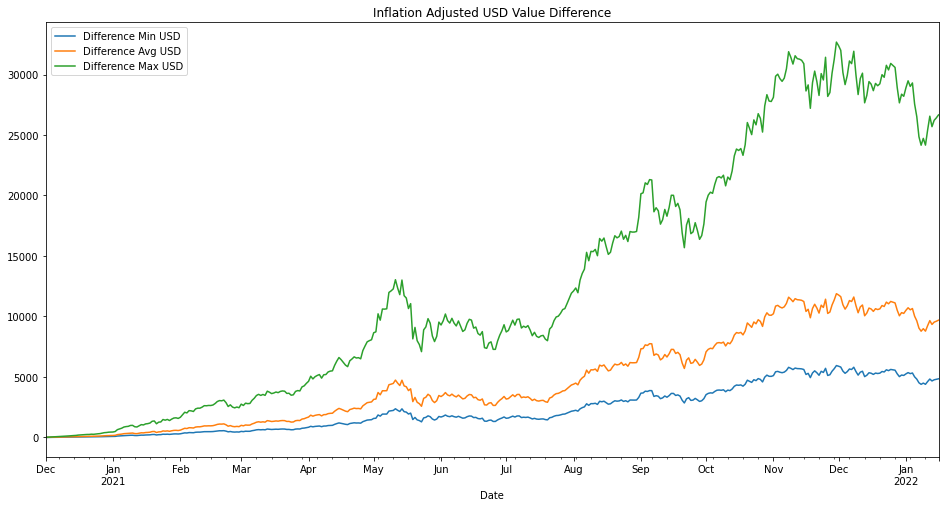

In [264]:
pl = eth_allocation_df.plot(y=['Difference Min USD','Difference Avg USD', 'Difference Max USD'],figsize=(16,8),title='Inflation Adjusted USD Value Difference')